<a href="https://colab.research.google.com/github/Moonak/Stocks/blob/master/S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r StockData
!rm -r Stocks
!git clone https://github.com/Moonak/StockData.git
!git clone https://github.com/Moonak/Stocks.git
from Stocks.stock import load
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
data = [Files for Files in listdir('StockData')]
print('Number of NAMDS are :', len(data))

Cloning into 'StockData'...
remote: Enumerating objects: 4788, done.
remote: Total 4788 (delta 0), reused 0 (delta 0), pack-reused 4788
Receiving objects: 100% (4788/4788), 27.13 MiB | 20.01 MiB/s, done.
Resolving deltas: 100% (3437/3437), done.
Cloning into 'Stocks'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 99 (delta 46), reused 40 (delta 11), pack-reused 0
Unpacking objects: 100% (99/99), done.
Number of NAMDS are : 1667


In [0]:
import matplotlib.pyplot as plt
import numpy as np
def cal(namad):
  namad.avarage(nweeks=1)
  namad.norm()
  namad.train(10,train_size=1,verbose=0,NPW=9,epochs=60,dropout_prob=.0,lstm_units=250, batch_size=5)
  plt.plot(np.arange(len(namad.close_avg)) , namad.close_avg,'r')
  plt.plot([int(1*(len(namad.close_avg)))+i for i in range(-9,1)],namad.estimate)
  plt.xlim(len(namad.close_avg)-10,len(namad.close_avg)+1)
  plt.ylim(min(np.min(namad.estimate[-10:]),np.min(namad.close_avg[-5:]))-0.1,\
           max(np.max(namad.estimate[-10:]),np.max(namad.close_avg[-5:])+0.1))
  plt.legend([namad.name])
  plt.show()
  print(namad.name)

In [2]:
namads = []
IndexErrorCounter=0
IsADirectoryErrorCounter=0
for namad in data:
  try: namads.append(load(namad))
  except IndexError: IndexErrorCounter+=1
  except IsADirectoryError: IsADirectoryErrorCounter+=1
print("IndexError=",IndexErrorCounter)
print("IsADirectoryError=",IsADirectoryErrorCounter)

IndexError= 324
IsADirectoryError= 1


In [3]:
AverageErrorCounter=0
for namad in namads:
  try:
    namad.avarage(nweeks=1)
    namad.norm()
  except: AverageErrorCounter+=1
print("AverageError=",AverageErrorCounter)

AverageError= 49


In [4]:
for namad in namads:
  if np.average(namad.vol[-10:])> 1e9 :
    print("#",namad.name,":",np.average(namad.vol[-10:]))

# Index Group 65 : 1049862475.1
# Main Board Index : 1583453882.5
# Top 50 Index : 1204438632.2
# TotalEquel Weithed : 2513071024.4
# Industy Index : 1452264530.3
# TotalEqualWeightPr : 2513071024.4
# Pasargad Bank-a : 2566666666.6666665
# Free Float Index : 2513071024.4
# Overall Index : 2513071024.4
# Total Price Index : 2513071024.4


In [0]:
trends=[]
for namad in namads:
  if np.average(namad.vol[-10:])> 1e8:
    print("#",namad.filename,":",np.average(namad.vol[-10:]))    
    try:
      print('#',namads.index(namad),'out of',len(namads))
      namad.train(8,train_size=1,NPW=9,epochs=20,dropout_prob=.0,lstm_units=200, batch_size=20)
      trends.append([namad, (namad.estimate[-2] - namad.estimate[-1]) / namad.estimate[-2]])
    except: print("faild")

In [52]:
for trend in trends:
   if -trend[1] > 0.10: print(trend[0].name,"\t",-100*trend[1])

Saderat Bank-a 	 10.81890536501698
Hepco-a 	 22.763284175523747
Index Group 70 	 26.123067339821354
Pars Khodro-a 	 17.606060634273643


In [0]:
RIIR1=load('RIIR1-a.csv')
IKCO1=load('IKCO1-a.csv')
SDLP1=load('SDLP1-a.csv')
PARK1=load('PARK1-a.csv')
BSHP1=load('BSHP1-a.csv')
PKOD1=load('PKOD1-a.csv')
#DT861=load('DT861-a.csv')
BSDR1=load('BSDR1-a.csv')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 250)           252000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 250)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


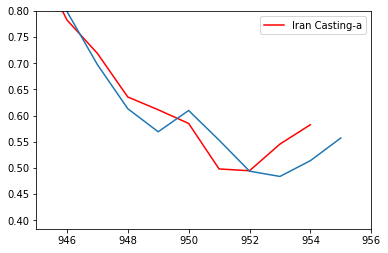

Iran Casting-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 250)           252000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 250)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


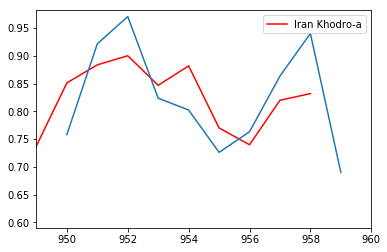

Iran Khodro-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 250)           252000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 250)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


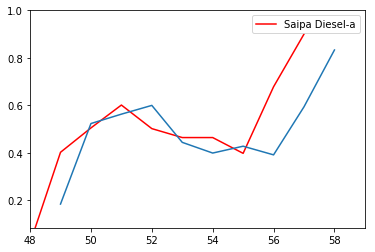

Saipa Diesel-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 250)           252000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 250)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


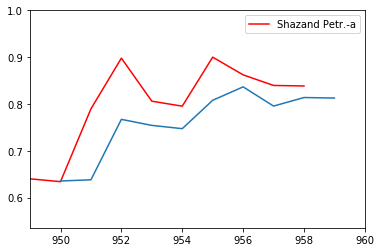

Shazand Petr.-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 10, 250)           252000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 250)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


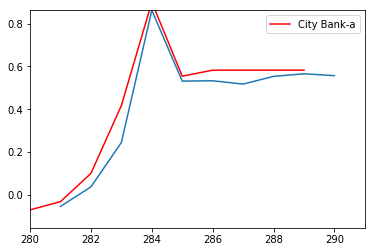

City Bank-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 10, 250)           252000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 250)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


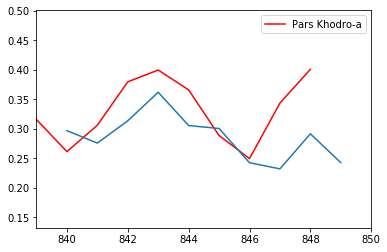

Pars Khodro-a
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10, 250)           252000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 250)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dropout_14 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________


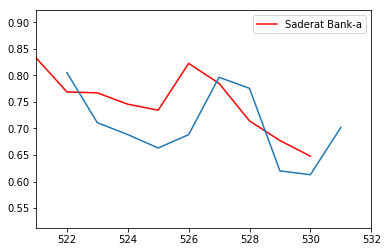

Saderat Bank-a


In [4]:
for n in [RIIR1,IKCO1,SDLP1,PARK1,BSHP1,PKOD1,BSDR1]:
  cal(n)

In [5]:
from joblib import Parallel, delayed
Parallel(n_jobs=-1)(delayed(cal)(n) for n in [RIIR1,IKCO1,SDLP1,PARK1,BSHP1,PKOD1,BSDR1])

KeyboardInterrupt: ignored